In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Dec  5 18:21:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
!pip install cellpose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [9]:
# Import modules
import numpy as np
import time, os, sys, random
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
from cellpose import models
from cellpose.io import imread
from cellpose import plot
from skimage.util import img_as_ubyte
import pandas as pd

#------------------------------------------------------
nb_images = 12

# Get path to folders containing images
#Image_Directory = os.getcwd() + "\\20151218_E14_BM_mTF8additionals_4"
#Image_Directory = r"C:\Users\alexi\EPFL\MA3\Machine_learning\20151218_E14_BM_mTF8additionals_4"  #Easier for me (Alexis) than finding of to get my path file nicely
Image_Directory = "/content/gdrive/MyDrive/ML_2_transcripted_cherry/TF1"
# other folders: 
# \\20151218_E14_BM_mTF8additionals_4
# "//20151125_BM_mTF8additionals_3//Composite_mBM-mTF8"
print(Image_Directory)


# Create Lists containing datapath to all images of Cherry/ Ypet files
image_format = "tif"
cherry_condition = "TexasRed"
ypet_condition = "YFP"
Cherry_file = np.empty(12, dtype=object)
Ypet_file = np.empty(12, dtype=object)


# Walk through directory (call all files) and assign them to proper list
for root, dirs, files in os.walk(Image_Directory, topdown=False): # root = given in Input, dirs = folders, files= files
    c_i = 0
    y_i = 0
    for f in files:
        if f.endswith(image_format) and cherry_condition in f: 
            Cherry_file[c_i] = os.path.join(root, f)
            c_i = c_i+1
        elif f.endswith(image_format) and ypet_condition in f: 
            Ypet_file[y_i] = os.path.join(root, f)
            y_i = y_i+1

assert len(Cherry_file) == len(Ypet_file), f"There are {len(Cherry_file)} Cherry files and {len(Ypet_file)} Ypet files. The number has to be equal, check manually what's missing"


# Initialize lists containing cherry, ypet images
cherry_imgs = np.ndarray(nb_images,dtype = np.ndarray)
ypet_imgs = np.ndarray(nb_images,dtype = np.ndarray)


# Read image (We donnot add it in for loop above to enable reading subset of image)
for i in range(nb_images): #len(Cherry_file):
    cherry_imgs[i] = imread(Cherry_file[i])
    ypet_imgs[i] = imread(Ypet_file[i])
    
cherry_imgs = cherry_imgs.tolist()
ypet_imgs = ypet_imgs.tolist()

print(len(cherry_imgs))

#Without GPU: 26 mins
#Standart GPU: 
#Premium GPU: 9 mins

/content/gdrive/MyDrive/ML_2_transcripted_cherry/TF1
12


In [10]:
# Definine parameters for cellpose module using nuclei modus
# https://cellpose.readthedocs.io/en/latest/settings.html
channels = [0,0] # Corresponds to greyscale image
diameter = None # Model was trained on diameters of 17 pixels. None-> automated estimation of the diameter. Can be changed by hand later
flow_threshold = 0.4 # maximum allowed error of the flows for each mask, default = 0.4
gpu = False
model_type='nuclei'

# Set model
model = models.Cellpose(gpu, model_type)

# Nuclei segmentation of all images within cherry_imgs list
masks, flows, styles, diams = model.eval(cherry_imgs, diameter=diameter, channels=channels, flow_threshold=flow_threshold, do_3D=False)





100%|██████████| 25.3M/25.3M [00:01<00:00, 16.8MB/s]
100%|██████████| 3.54k/3.54k [00:00<00:00, 7.24MB/s]


In [13]:
from cellpose import io
import os
#os.mkdir("/content/gdrive/MyDrive/ML_2_transcripted_cherry/masks_TF1/A_1")
files_names = ["/content/gdrive/MyDrive/ML_2_transcripted_cherry/masks_TF1/A_1/img_"+str(i+1) for i in range(nb_images)]
io.masks_flows_to_seg(cherry_imgs, masks, flows, diams, files_names, channels)

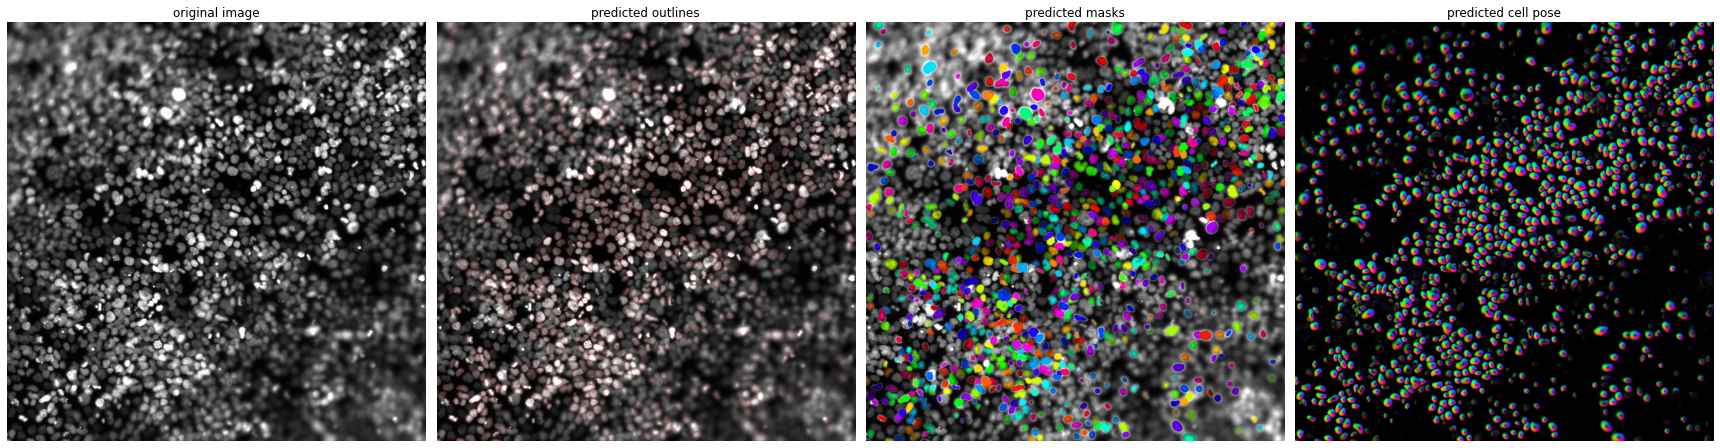

In [ ]:
# Display results
image_i = 0
fig = plt.figure(figsize=(24,8))
plot.show_segmentation(fig, cherry_imgs[image_i], masks[image_i], flows[image_i][0], channels)
plt.tight_layout()
plt.show()

In [ ]:
# Try with first image: masks[0]
columnname = ["" for i in range(1)]
patch_size = [0 for i in range(1)]
mean_intensity = [0 for i in range(1)]
sum_intensity = [0 for i in range(1)]
median_intensity = [0 for i in range(1)]
variance_intensity = [0 for i in range(1)]
imgs = [-1 for i in range(1)]
ypet_intensity_glob = pd.DataFrame(index=columnname)
ypet_intensity_glob['patch_size'] = patch_size
ypet_intensity_glob['mean_intensity'] = mean_intensity
ypet_intensity_glob['sum_intensity'] = sum_intensity
ypet_intensity_glob['median_intensity'] = median_intensity
#ypet_intensity_glob['variance_intensity'] = variance_intensity
ypet_intensity_glob['img'] = imgs

    
for j in range(12):
    mask =  masks[j]   #Putting 1 here (when test_round = 2 completely changes the results)
    ypet = ypet_imgs[j]
    range_s = range_s = range(len(np.unique(mask)))  #IMAGE SPECIFIC: cases where cell are big enough (sell last cell of the notebook)
    columnname = ["" for i in range_s]
    patch_size = [0 for i in range_s]
    mean_intensity = [0 for i in range_s]
    sum_intensity = [0 for i in range_s]
    median_intensity = [0 for i in range_s]
    #variance_intensity = [0 for i in range_s]
    imgs = [j for i in range_s]
    
    #assert masks_df.shape == ypet_df.shape, f"Shape of mask is {masks_df.shape} and the shape of ypet image is { ypet_df.shape}. The size has to be the same. Check if normalization is needed"

    # Calculate patch size and corresponding ypet signal (mean) and store it into ypet_intensity
    for i in range_s : # masks_df.nunique().size 
        cur = ypet[mask==i]
        patch_size_ = np.count_nonzero(~np.isnan(cur))
        if ((patch_size_ > 10) & (patch_size_ < 50000)):
            mean_intensity[i] = np.nanmean(cur)
            columnname[i] = "patch_" + str(i)                             #We should not forgot that there is a -1 here. (when it is here)               
            patch_size[i] = patch_size_
            sum_intensity[i] = np.sum(np.sum(cur))
            median_intensity[i] = np.nanmedian(cur)
            #variance_intensity[i] = np.var(ypet_df[masks_df==i])
    ypet_intensity = pd.DataFrame(index=columnname)
    ypet_intensity['patch_size'] = patch_size
    ypet_intensity['mean_intensity'] = mean_intensity
    ypet_intensity['sum_intensity'] = sum_intensity
    ypet_intensity['median_intensity'] = median_intensity
    #ypet_intensity['variance_intensity'] = variance_intensity
    ypet_intensity['img'] = imgs
    ypet_intensity_glob = pd.concat([ypet_intensity_glob,ypet_intensity])
    print("step "+str(j)+" over "+str(nb_images)+ " is done!")
    

step 0 over 12 is done!
step 1 over 12 is done!
step 2 over 12 is done!
step 3 over 12 is done!
step 4 over 12 is done!
step 5 over 12 is done!
step 6 over 12 is done!
step 7 over 12 is done!
step 8 over 12 is done!
step 9 over 12 is done!
step 10 over 12 is done!
step 11 over 12 is done!


In [ ]:
path = '/content/drive/MyDrive/Project_2_ml/20151218_E14_BM_mTF8additionals_4/Features/features_cells_TF8_A1.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
    ypet_intensity_glob.to_csv(f)


In [19]:
"""  Was just to create the ~800 folders easier :)
import os
alphabet = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
for k in range(8):
  for j in range(8):
    for i in range(12):
      os.mkdir("/content/gdrive/MyDrive/ML_2_transcripted_cherry/masks_TF"+str(k+1)+"/"+alphabet[j]+"_"+str(i+1))
"""

''' to remove the "copie" part of it once I did copy
import os
os.rename("/content/gdrive/MyDrive/ML_2_transcripted_cherry/masks_TF1/A_1/Copie de img_1_seg.npy","/content/gdrive/MyDrive/ML_2_transcripted_cherry/masks_TF1/A_1/img_1_seg.npy")
'''
